# cygnus-victim
Analysis of how Cygnus prefetches interact with the lines they replace ("victims").

In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
from utils import utils

In [2]:
cygnus_dir = '/scratch/cluster/cmolder/pythia/degree1_featureless_tuned_nozeroaction/'

suites = [('spec06', 'one_phase'), ('gap', 'one_phase')]

In [22]:
def load_cygnus_secondary_stats(path: str):
    stats = {
        'timeliness': {},
        'timeliness_cycles': {},
        'lateness': {},
        'lateness_cycles': {},
        'earliness': {},
        'earliness_cycles': {},
        'victim_referenced': {},
        'hidden_cycles_pct': {}
    }

    with open(path) as f:
        for line in f:
            # Timeliness stats
            if 'timeliness:' in line:
                action = line.split()[0]
                if action == 'total':
                    continue
                stats['timeliness'][int(action)] = float(line.split()[4])
                stats['timeliness_cycles'][int(action)] = float(line.split()[2])
                stats['lateness'][int(action)] = float(line.split()[10])
                stats['lateness_cycles'][int(action)] = float(line.split()[8])
                stats['earliness'][int(action)] = float(line.split()[16])
                stats['earliness_cycles'][int(action)] = float(line.split()[14])
            elif 'victim ref:' in line:
                line = line.replace('%', '')
                action = line.split()[0]
                if action == 'total':
                    continue
                stats['hidden_cycles_pct'][int(action)] = float(line.split()[2])
                stats['victim_referenced'][int(action)] = float(line.split()[20])
    return stats

def get_trace_path(exp_dir, trace, prefetcher, seed=1337):
    if 'cygnus' in prefetcher:
        pref_degree = 0
    else:
        pref_degree = 1

    results_file = f'{trace}-l2pf_{prefetcher}_{pref_degree}-seed_{seed}.txt'
    return os.path.join(exp_dir, 'champsim_results', results_file)

# Action distribution tables

In [26]:
def dict_to_table(dict):
    return pd.DataFrame(dict).astype(float).sort_index()

In [24]:
from collections import defaultdict
stats = {}
for suite, _ in suites:
    for trace, phase in utils.phases['one_phase'].items():
        if trace in utils.suites[suite]:
            full_trace = f'{trace}_{phase}' if phase != 'default' else trace        
            stats[full_trace] = load_cygnus_secondary_stats(get_trace_path(cygnus_dir, full_trace, 'cygnus'))

dict_keys(['astar_313B', 'bwaves_1861B', 'cactusADM_734B', 'GemsFDTD_109B', 'lbm_94B', 'leslie3d_1116B', 'libquantum_1210B', 'mcf_46B', 'milc_360B', 'omnetpp_340B', 'soplex_66B', 'sphinx3_2520B', 'xalancbmk_99B', 'zeusmp_600B', 'bc', 'bfs', 'cc', 'pr', 'sssp', 'tc'])
dict_keys(['timeliness', 'timeliness_cycles', 'lateness', 'lateness_cycles', 'earliness', 'earliness_cycles', 'victim_referenced'])


## Stats

### mcf_46B

In [27]:
dict_to_table(stats['mcf_46B'])

,timeliness,timeliness_cycles,lateness,lateness_cycles,earliness,earliness_cycles,victim_referenced
-6,-929.1,-69.082,3112.1,176.556,2405.3,95.082,0.4
-3,-970.2,-67.359,2782.8,178.754,1643.8,93.288,0.5
-1,-1629.2,-129.901,1960.8,157.505,497.0,47.055,0.4
1,-232.8,-21.355,364.9,28.907,562.8,24.144,0.4
3,-1168.5,-62.065,2734.6,177.614,919.1,91.957,0.6
4,-1434.8,-104.478,2840.0,189.948,1747.5,89.077,0.6
5,-1131.2,-67.129,2923.1,176.552,1491.5,93.029,0.5
10,-135.8,-22.070,2603.4,165.321,1737.9,86.702,0.4
11,-92.0,-21.335,2753.5,174.343,1839.2,89.693,0.4
12,-328.4,-34.479,3149.8,184.954,1859.9,82.228,0.3


# Action distribution plots

In [43]:
def dict_to_plot(dict, metric, trace_name='', color='C0'):
    fig, ax = plt.subplots()
    df = dict_to_table(dict)[metric]
    df.plot.bar(ax=ax, figsize=(6, 3), color=color)

    ax.set_xlabel('Action')
    ax.set_ylabel(metric)
    ax.set_axisbelow(True)
    ax.grid(axis='y', zorder=0)    

    fig.suptitle(f'cygnus {metric.lower()} on {trace_name}')

### Victim selection

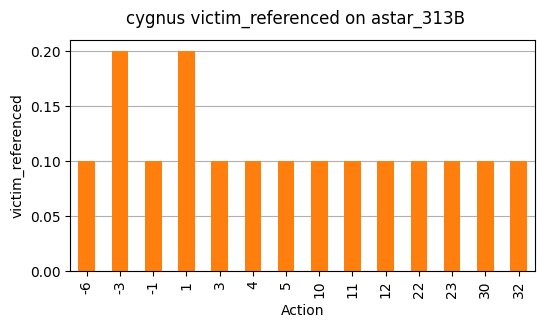

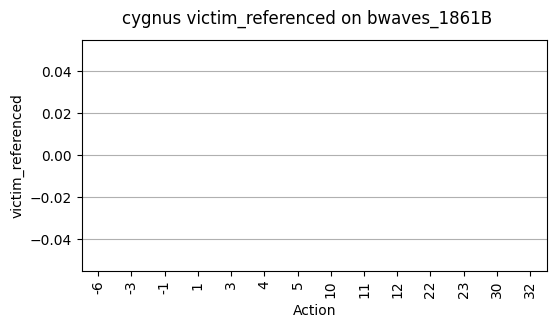

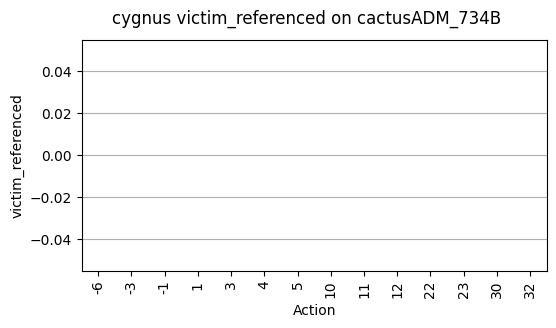

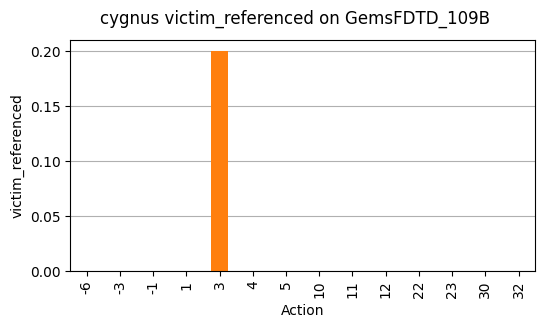

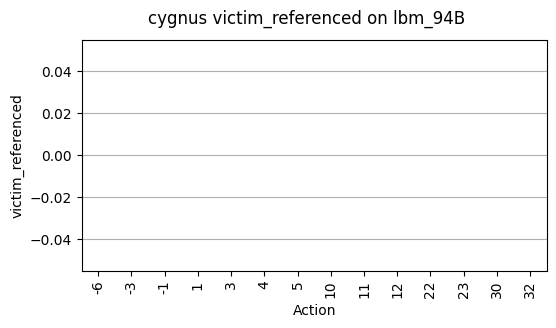

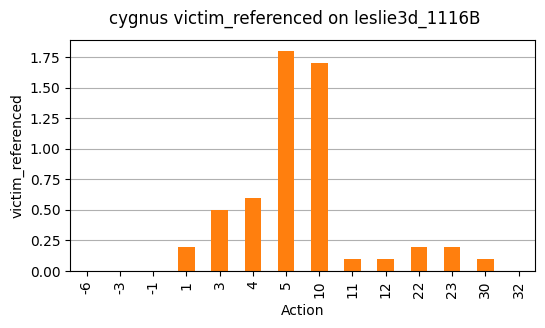

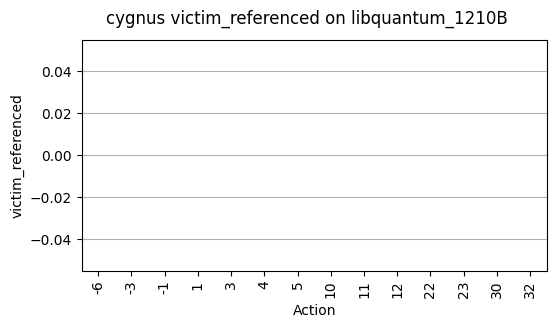

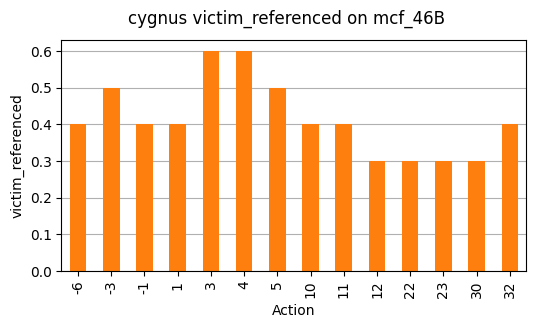

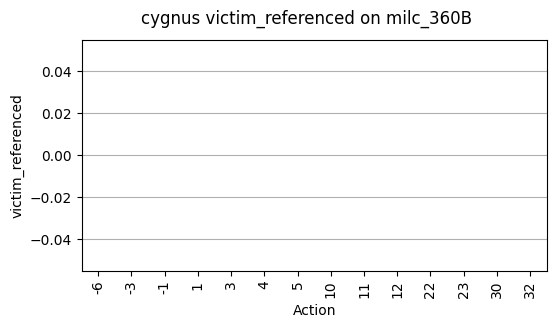

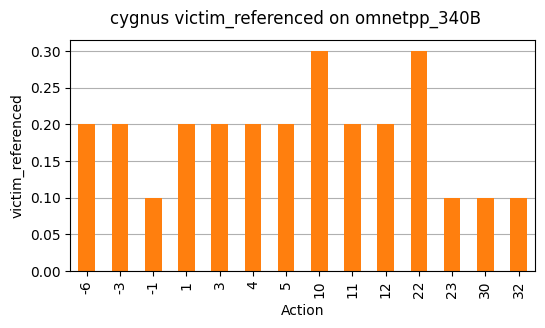

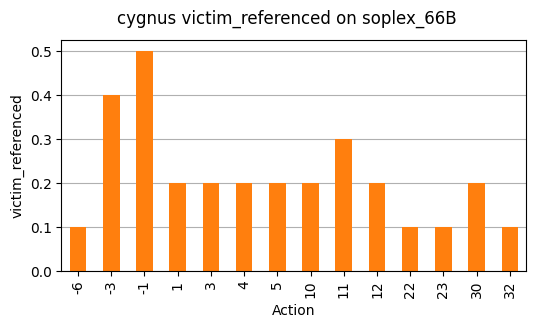

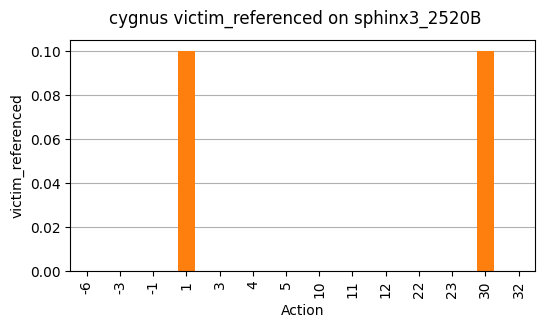

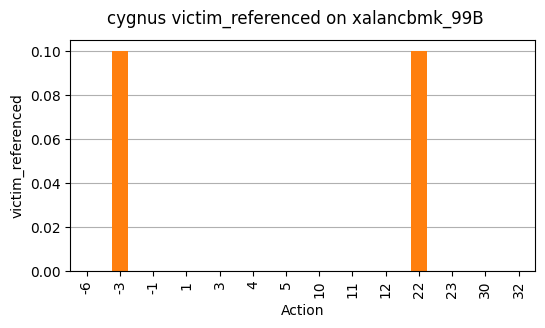

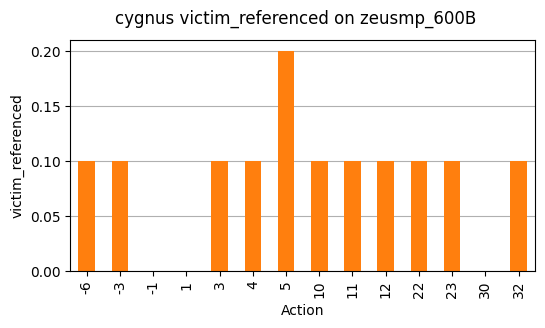

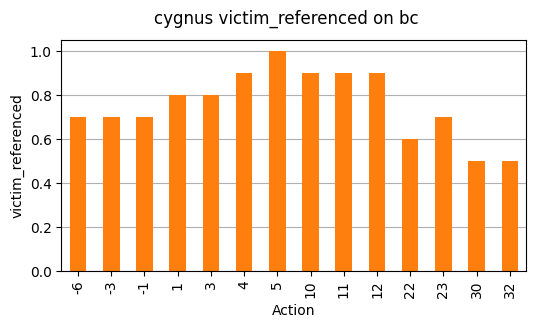

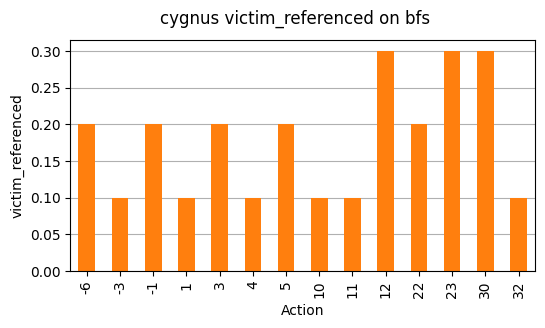

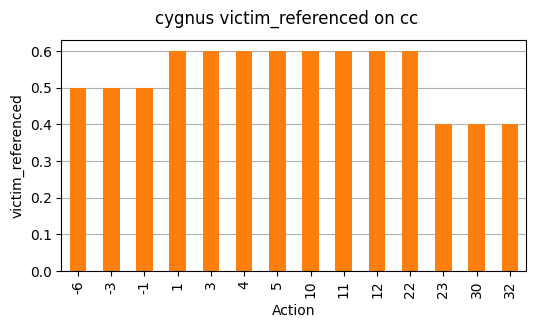

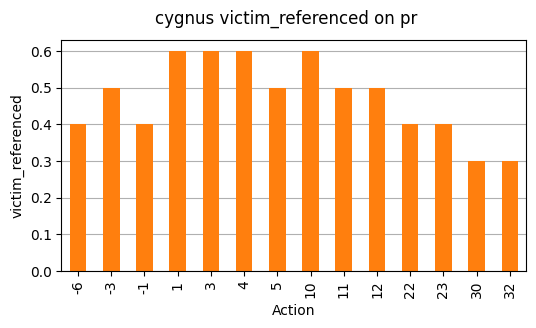

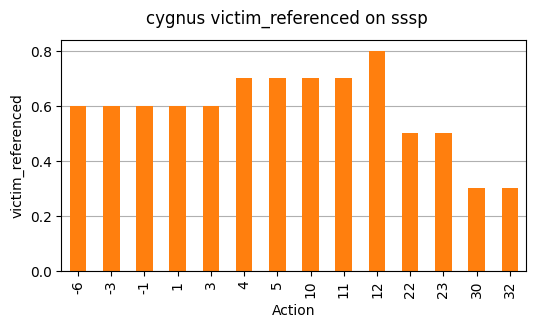

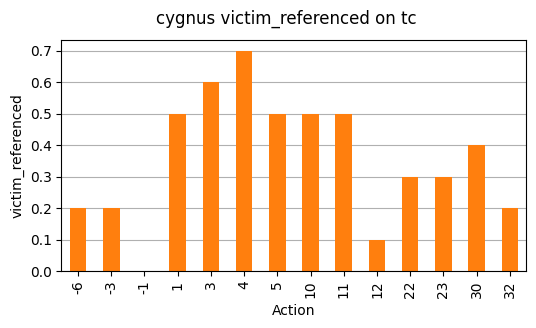

In [44]:
for trace in stats.keys():
    dict_to_plot(stats[trace], 'victim_referenced', trace_name=trace, color='C1')

## Avg. timeliness

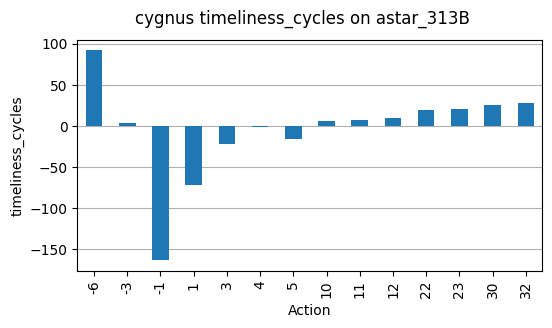

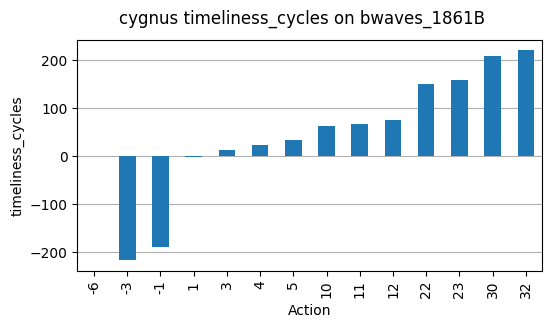

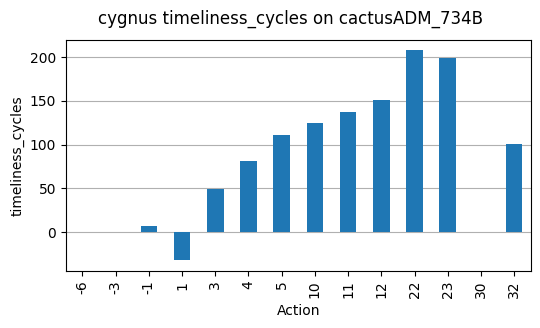

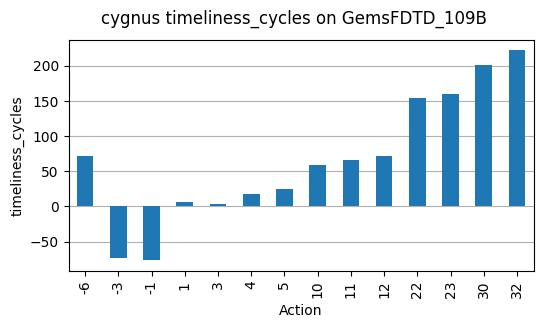

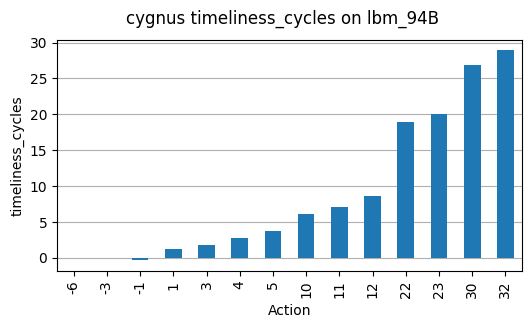

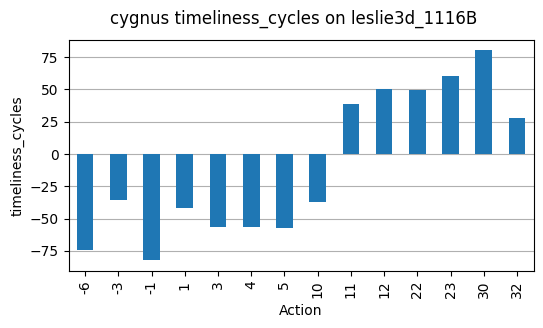

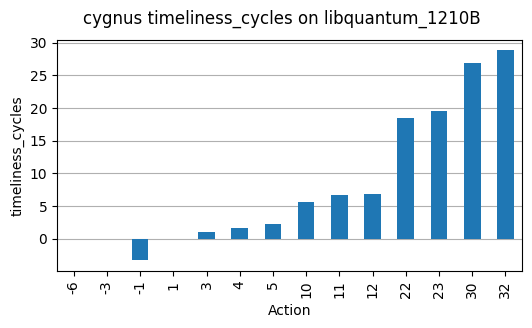

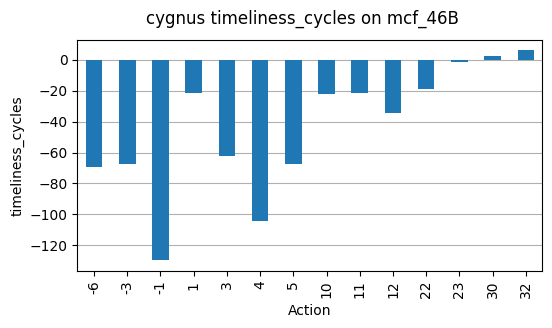

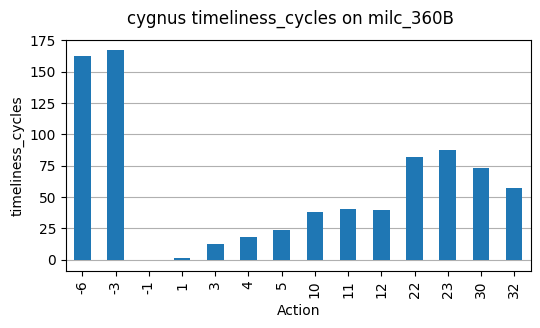

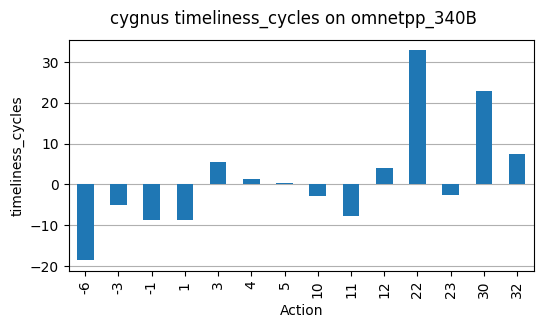

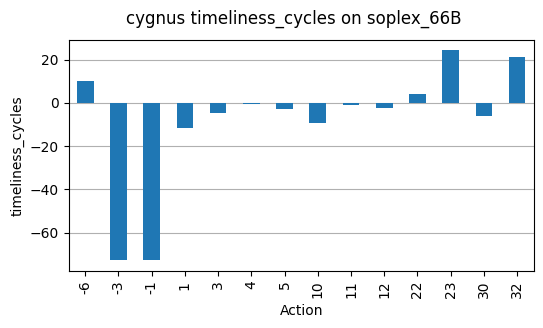

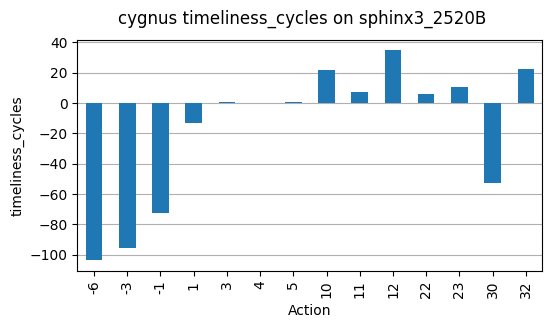

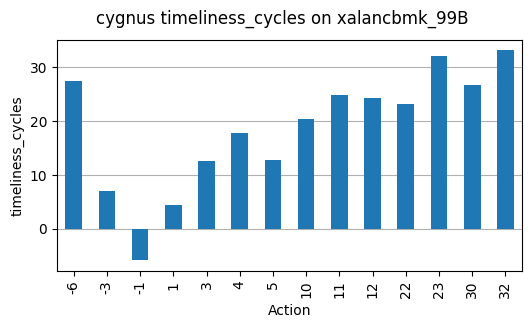

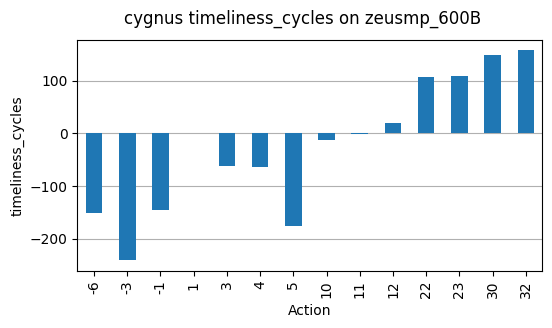

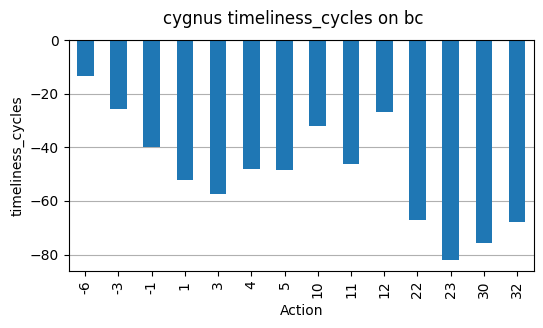

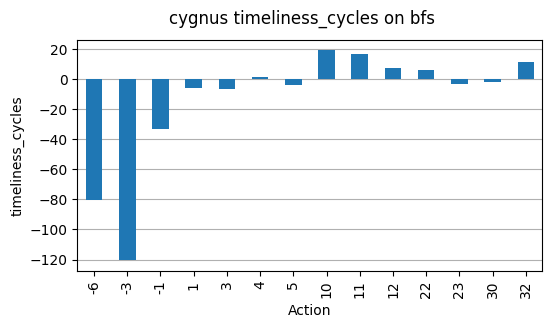

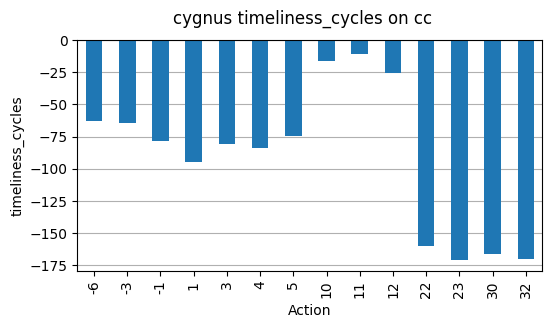

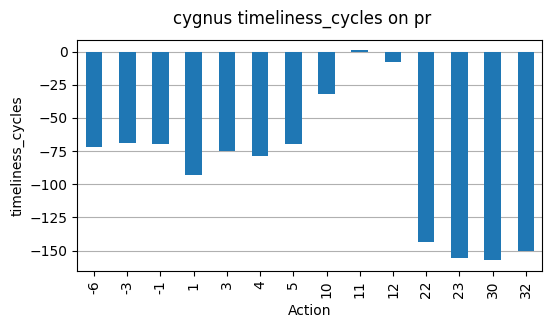

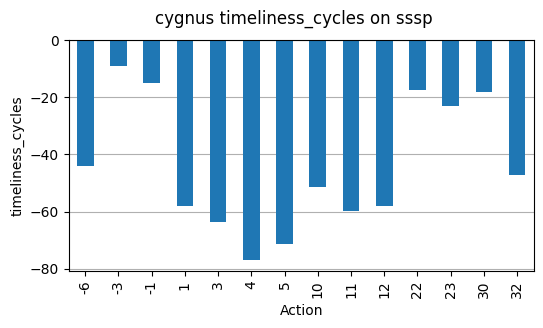

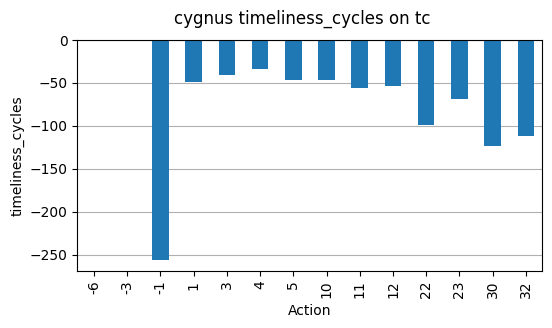

In [47]:
for trace in stats.keys():
    dict_to_plot(stats[trace], 'timeliness_cycles', trace_name=trace, color='C0')

## Avg. earliness

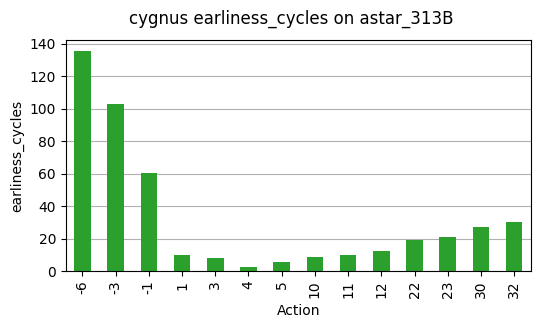

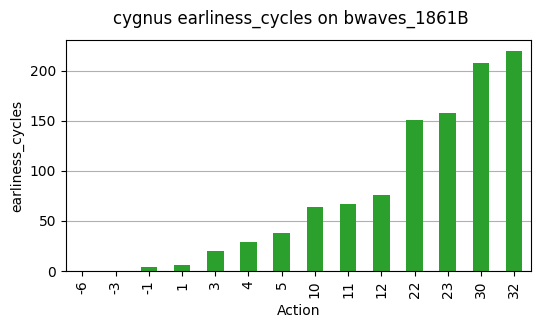

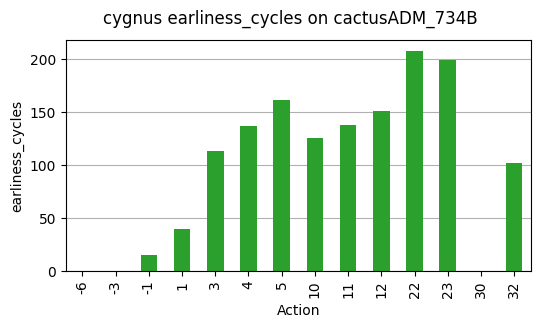

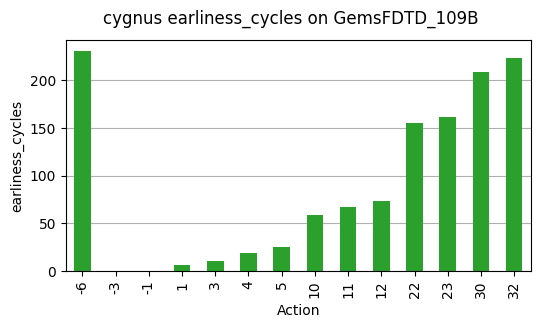

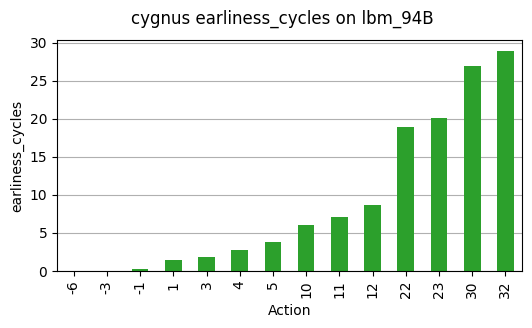

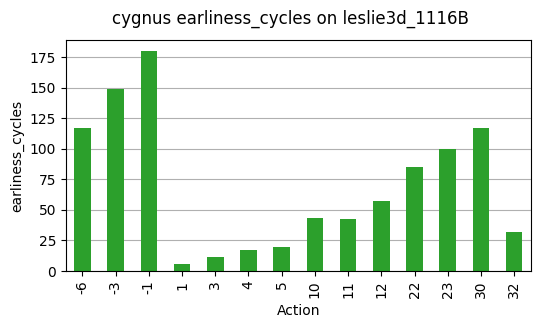

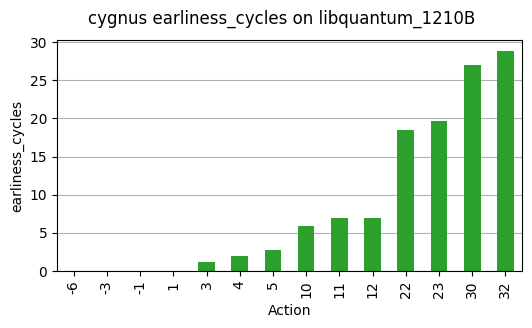

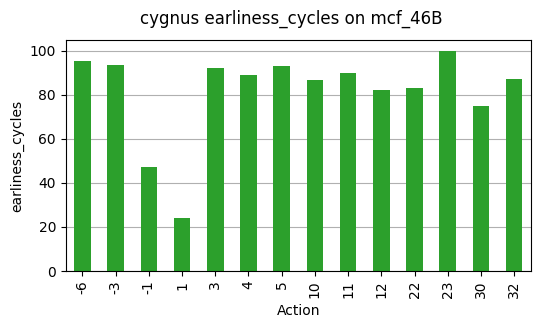

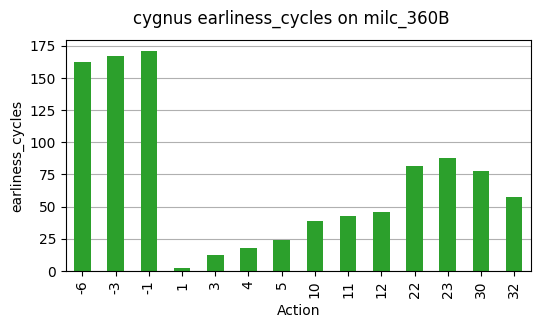

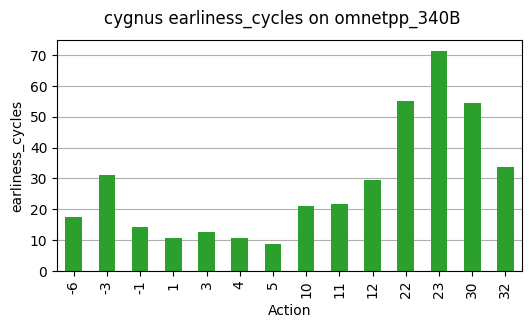

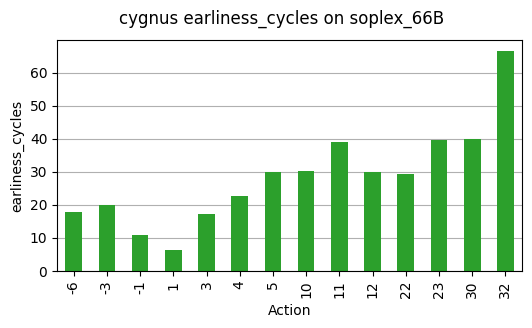

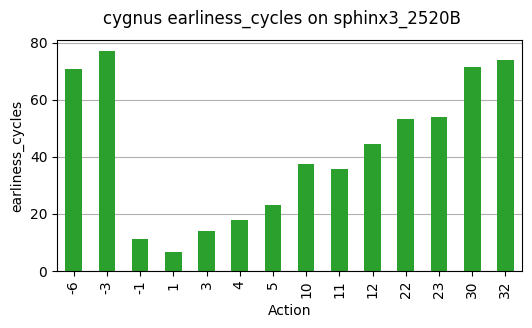

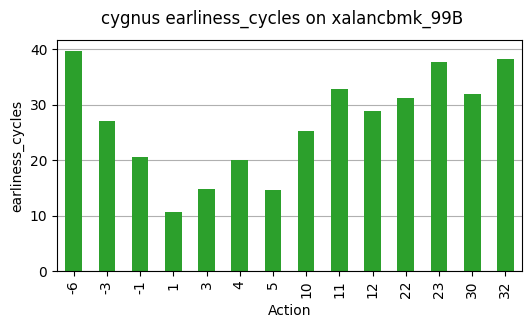

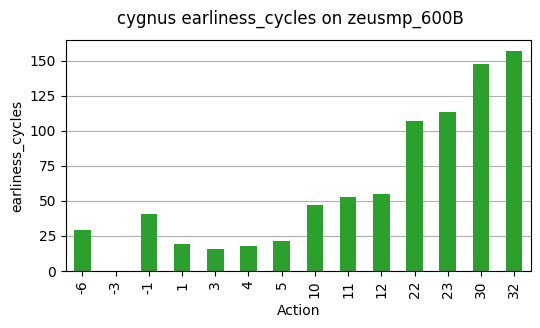

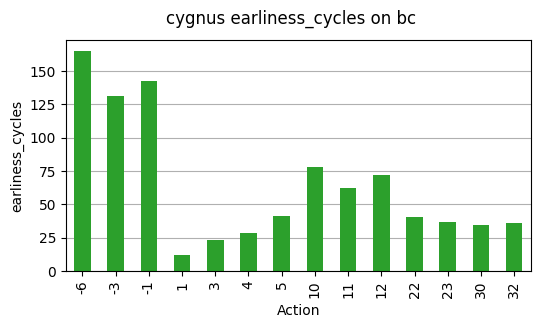

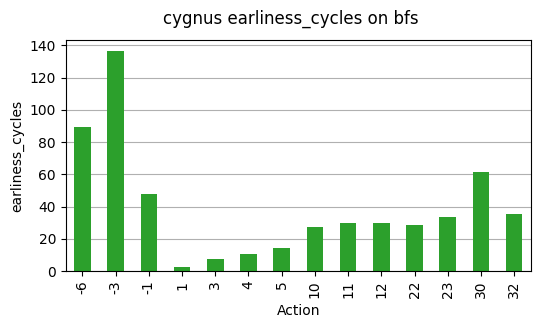

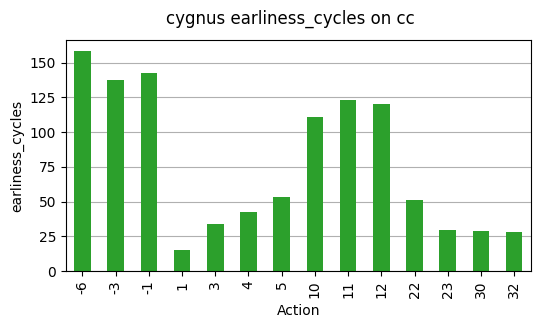

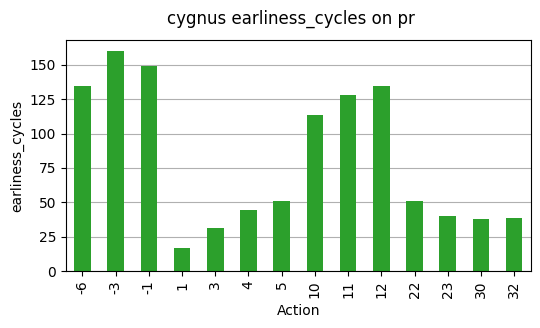

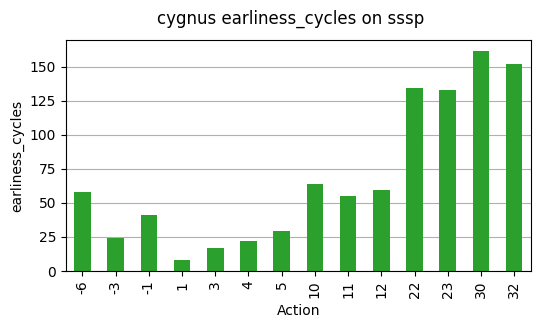

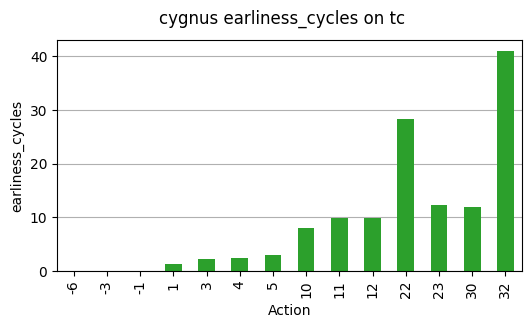

In [46]:
for trace in stats.keys():
    dict_to_plot(stats[trace], 'earliness_cycles', trace_name=trace, color='C2')

## Avg. lateness

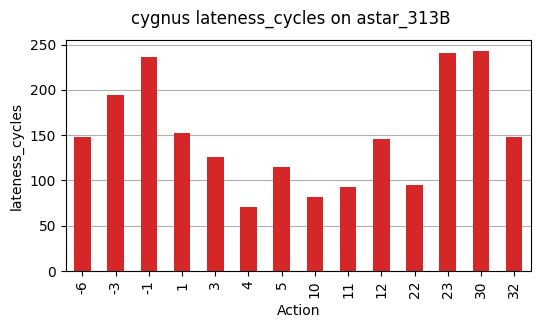

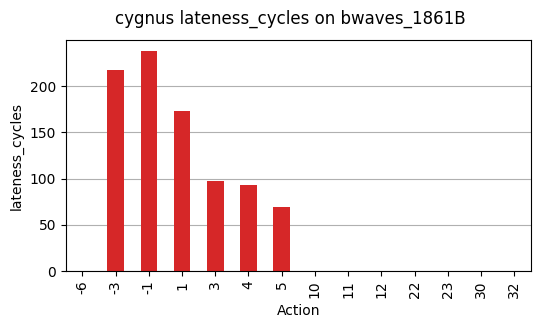

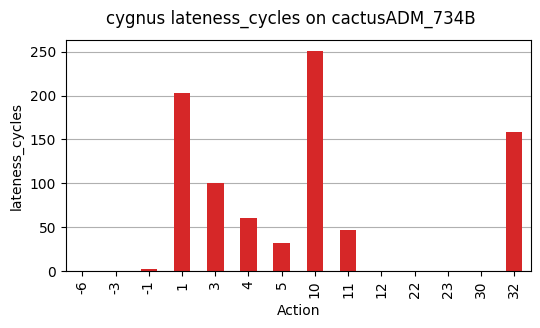

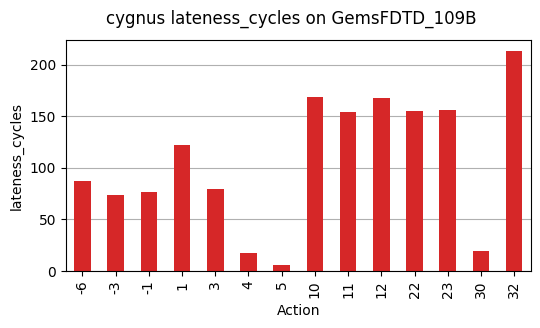

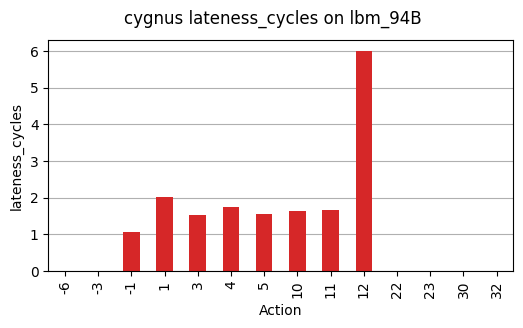

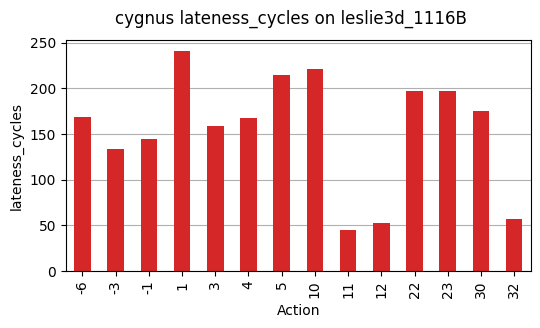

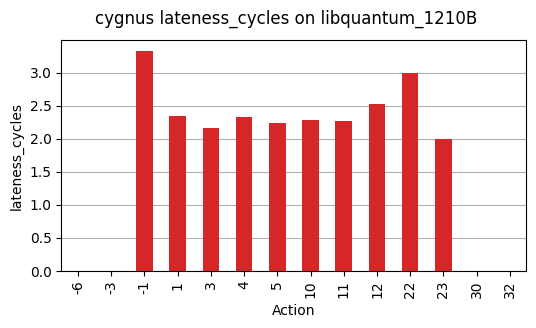

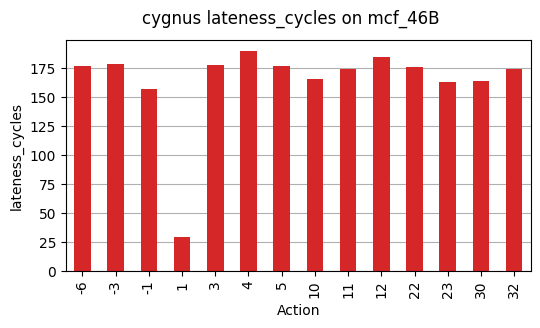

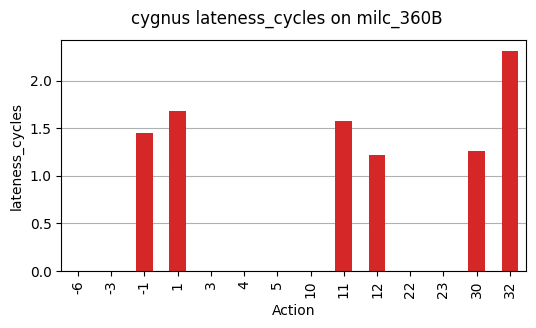

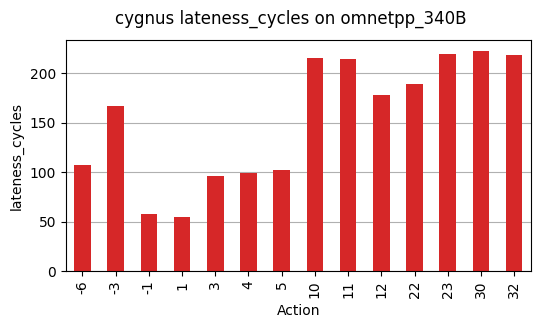

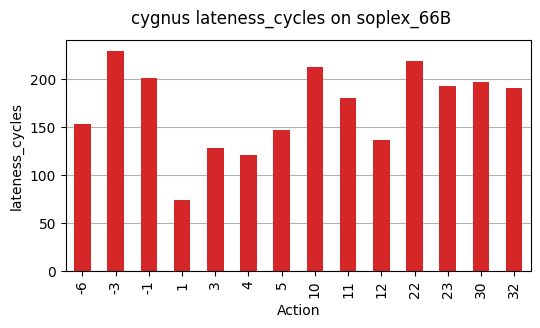

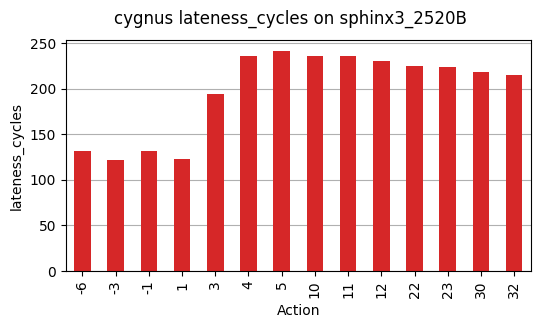

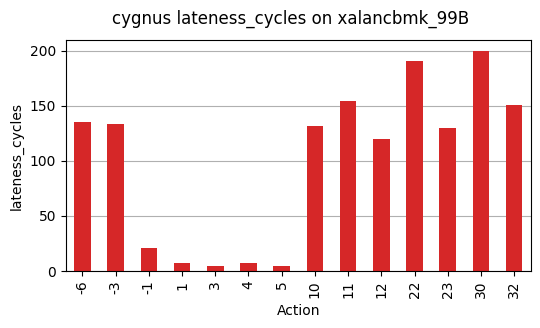

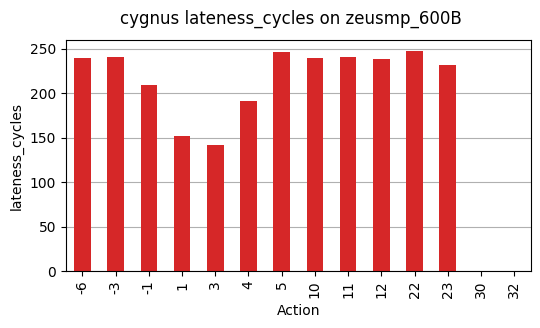

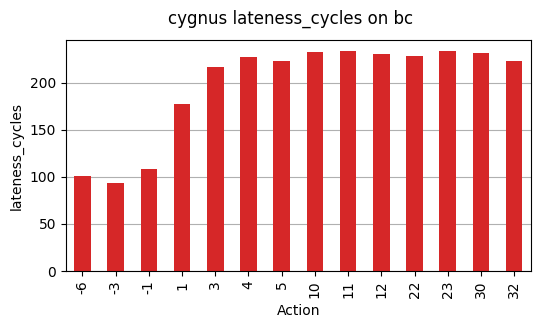

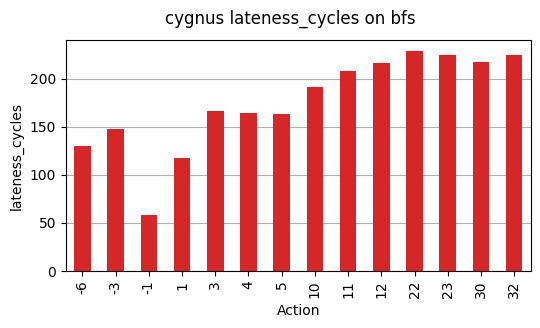

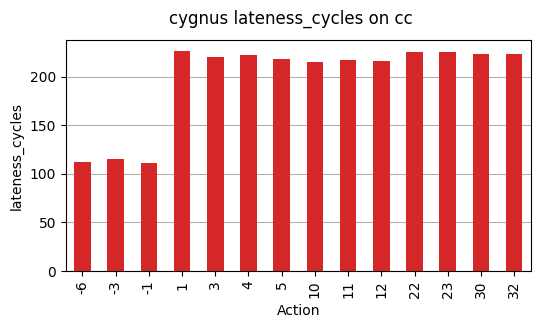

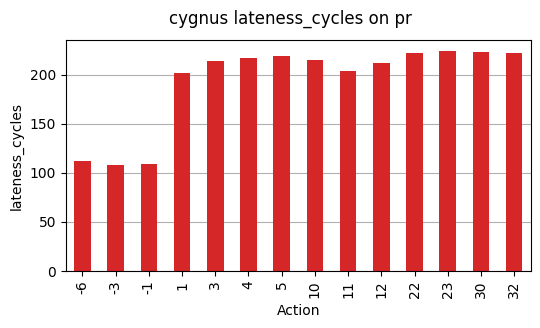

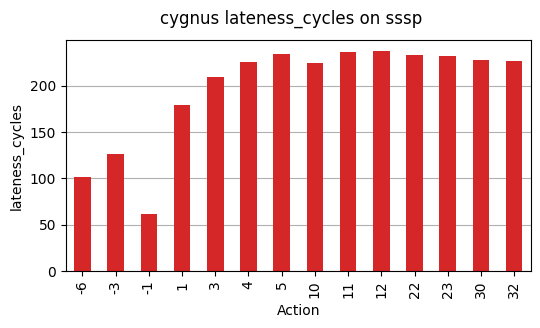

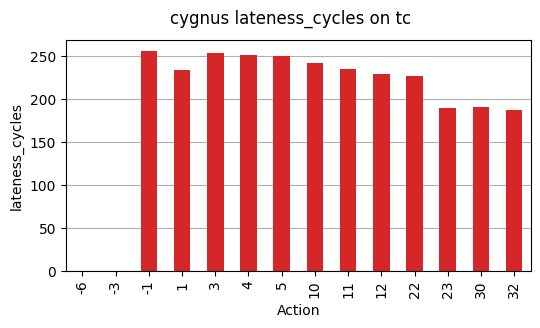

In [48]:
for trace in stats.keys():
    dict_to_plot(stats[trace], 'lateness_cycles', trace_name=trace, color='C3')